# N modos normales en 2D

[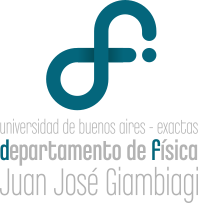](https://www.df.uba.ar/)  

Adaptación del notebook de Facundo Joaquin Garcia, 2.o cuat. 2020   
[cc-by-sa-80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2021 [Víctor A. Bettachini](mailto:bettachini@df.uba.ar)  

---

In [1]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='jshtml')

In [2]:
def Modo(i):
    global modoLongitudinal, d, L, ModoTransversal
    #global modoLongitudinal
    #global d
    #global L
    #global ModoTransversal
    Xeq = d
    
    if modoLongitudinal != 0:
        j = modoLongitudinal - 1
        A=D[0:n,j] #j es el modo seleccionado por el usuario
        omega0=np.sqrt(omega2[j])
        
    if ModoTransversal != 0:
        j1 = ModoTransversal -1
        B=Dy[0:n,j1] #j es el modo seleccionado por el usuario
        omega0Y=np.sqrt(omega2y[j1])
        
    t=np.linspace(0,15,100)
    phi = 0
    X=np.zeros(n)
    Y=np.zeros(n)
    
    for h in range(n):
        if modoLongitudinal != 0: 
            Amp = A[h]
            X[h] = Amp*np.cos(omega0*t[i]+phi)+h*Xeq+2*Xeq
        if ModoTransversal != 0:
            AmpY = B[h]
            Y[h] = AmpY*np.cos(omega0Y*t[i]+phi)
            
    for q in range(n):
        line, = reshor[q]
        linesup, = ressup[q]
        lineinf, = resinf[q]
        dots, = mass[q]
        if modoLongitudinal !=0:
            if q==0: 
                line.set_data([Xeq,X[q]],[0,Y[q]])
            elif q==n-1: 
                line.set_data([X[q-1],X[q]],[Y[q-1],Y[q]])
                lastreshor.set_data([X[q],Xeq*(q+3)],[Y[q],0])
            else: 
                line.set_data([X[q-1],X[q]],[Y[q-1],Y[q]])
            linesup.set_data([Xeq*(q+2),X[q]],[L/2,Y[q]])
            lineinf.set_data([Xeq*(q+2),X[q]],[-L/2,Y[q]])
        else:
            #A partir de aca
            if q==0:
                line.set_data([Xeq,Xeq*2],[0,Y[q]])
            elif q==n-1:
                line.set_data([Xeq*(q+1),Xeq*(q+2)],[Y[q-1],Y[q]])
                lastreshor.set_data([Xeq*(q+2),Xeq*(q+3)],[Y[q],0])
            else:
                line.set_data([Xeq*(q+1),Xeq*(q+2)],[Y[q-1],Y[q]])
                linesup.set_data([Xeq*(q+2),Xeq*(q+2)],[L/2,Y[q]])
                lineinf.set_data([Xeq*(q+2),Xeq*(q+2)],[-L/2,Y[q]])
            #Hasta aca
        if modoLongitudinal !=0:
            dots.set_data(X[q],Y[q])
        else:
            dots.set_data(Xeq*(q+2),Y[q])
    return (dots,line, lastreshor)

In [3]:
n = int(input("¿Cuántas partículas (N>1)?") )

j= int( input('¿Qué modo longitudinal entre '+ str(np.arange(n+1) )+ '? (0 para ninguno)' ) )
while j>n or j<0:
    print('Seleccione uno entre '+ str(np.arange(n+1) )+ '? (0 para ninguno)')
    j=int(input() )

j1= int( input('¿Qué modo transversal entre '+ str(np.arange(n+1) )+ '? (0 para ninguno)' ) )
while j1>n or j1<0:
    print('Seleccione uno entre '+ str(np.arange(n+1) )+ '? (0 para ninguno)')
    j1= int(input() )

modoLongitudinal = j
ModoTransversal = j1

¿Cuántas partículas (N>1)? 2
¿Qué modo longitudinal entre [0 1 2]? (0 para ninguno) 1
¿Qué modo transversal entre [0 1 2]? (0 para ninguno) 0


In [4]:
# Parámetros físicos
d= 3 # [m]
L= 5 # [m]
k1= 15 # [N m-1]
k2= 15 # [N m-1]
m= 3 # [kg]
l01= 3 # [m]
l02= 3 # [m]

In [5]:
# Matrices
Mx = np.zeros([n,n]) #Creo una matriz llena de 0 de tamaño nxn
My = np.zeros([n,n]) #Creo una matriz llena de 0 de tamaño nxn
for i in range(n):
    if i==0:
        Mx[i,i]  = 2/m*(k1 + k1*(1-l01/(L/2)))
        Mx[i,i+1] = -k2/m
        My[i,i]  = 2/m*(k1 + k2)
        My[i,i+1] = -k2/m
    elif i==n-1:
        Mx[i,i]  = 2/m*(k1 + k1*(1-l01/(L/2)))
        Mx[i,i-1] = -k2/m
        My[i,i]  = 2/m*(k1 + k2)
        My[i,i-1] = -k2/m
    else:
        Mx[i,i]  = 2/m*(k1 + k1*(1-l01/(L/2)))
        Mx[i,i-1] = -k2/m
        Mx[i,i+1] = -k2/m
        My[i,i]  = 2/m*(k1 + k2)
        My[i,i+1] = -k2/m
        My[i,i-1] = -k2/m

def omegaiDi(Mx):
    omega2, D = np.linalg.eig(Mx)
    omega2 = np.absolute(omega2)
    idx = omega2.argsort()[::1]   
    omega2 = omega2[idx]
    D = D[:,idx]
    for j in range(len(omega2)):
        m=omega2[j]
        idx=j
        c=j
        for i in range(j,len(omega2)):
            if omega2[i]<m:
                m=omega2[i]
                idx = c
            c+=1
        tmp=omega2[j]
        omega2[j]=m
        omega2[idx] = tmp
    return omega2, D

omega2, D = omegaiDi(Mx)
omega2y, Dy = omegaiDi(My)

In [6]:
fig, ax = plt.subplots(figsize=(3*n,L/1.25))
ax.set_xlabel('$x(t)$',fontsize= 15);
ax.set_ylabel('$y(t)$',fontsize= 15);
ax.set_xlim((0,n*d+ 3*d)); 
for i in range(n):
    ax.plot([d+(i+1)*d,d+(1+i)*d], (-L/2,L/2), '--',color  = 'black'); #Traza las lineas de las posiciones de equilibrio

ax.plot([d,2*d+ n*d],(-L/2,-L/2), '-',color  = 'black') #Traza el contenedor inferior
ax.plot([d,2*d+ n*d],(L/2,L/2), '-',color  = 'black') #Traza el contenedor superior
ax.plot([d,2*d+ n*d],(0,0), '--',color  = 'black') #Traza el contenedor superior
ax.plot([2*d+ n*d,2*d+ n*d],(-L/2,L/2), '-',color  = 'black') #Traza el contenedor derecho
ax.plot([d,d],(-L/2,L/2), '-',color  = 'black') #Traza el contenedor izquierdo
plt.close()

In [7]:
ressup = []
resinf = []
reshor = []
mass = []
for i in range(n+1):
    ressup.append(ax.plot([],[],'-',ms = 10,color = 'red', zorder = 2)) #Agrega a la lista vacia elementos que son los resortes
    resinf.append(ax.plot([],[],'-',ms = 10,color = 'red', zorder = 2))
    reshor.append(ax.plot([],[],'-',ms = 10,color = 'red', zorder = 2))
    mass.append(ax.plot([],[],'o',ms = 10,color = 'blue',zorder = 3)) #Agrega a la lista vacia elementos que son las masitas
lastreshor, = ax.plot([],[],'-',ms = 10,color = 'red', zorder = 2)

anim = animation.FuncAnimation(fig, Modo, frames= 50, interval=100)

In [8]:
anim